# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

### Dataset exploration

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


<a id='q1'></a>
# 1.) Is the distribution of body tempuratures normal?
#### First I'll plot 3 subplots consisting of a histogram, ecdf, and swarm plots

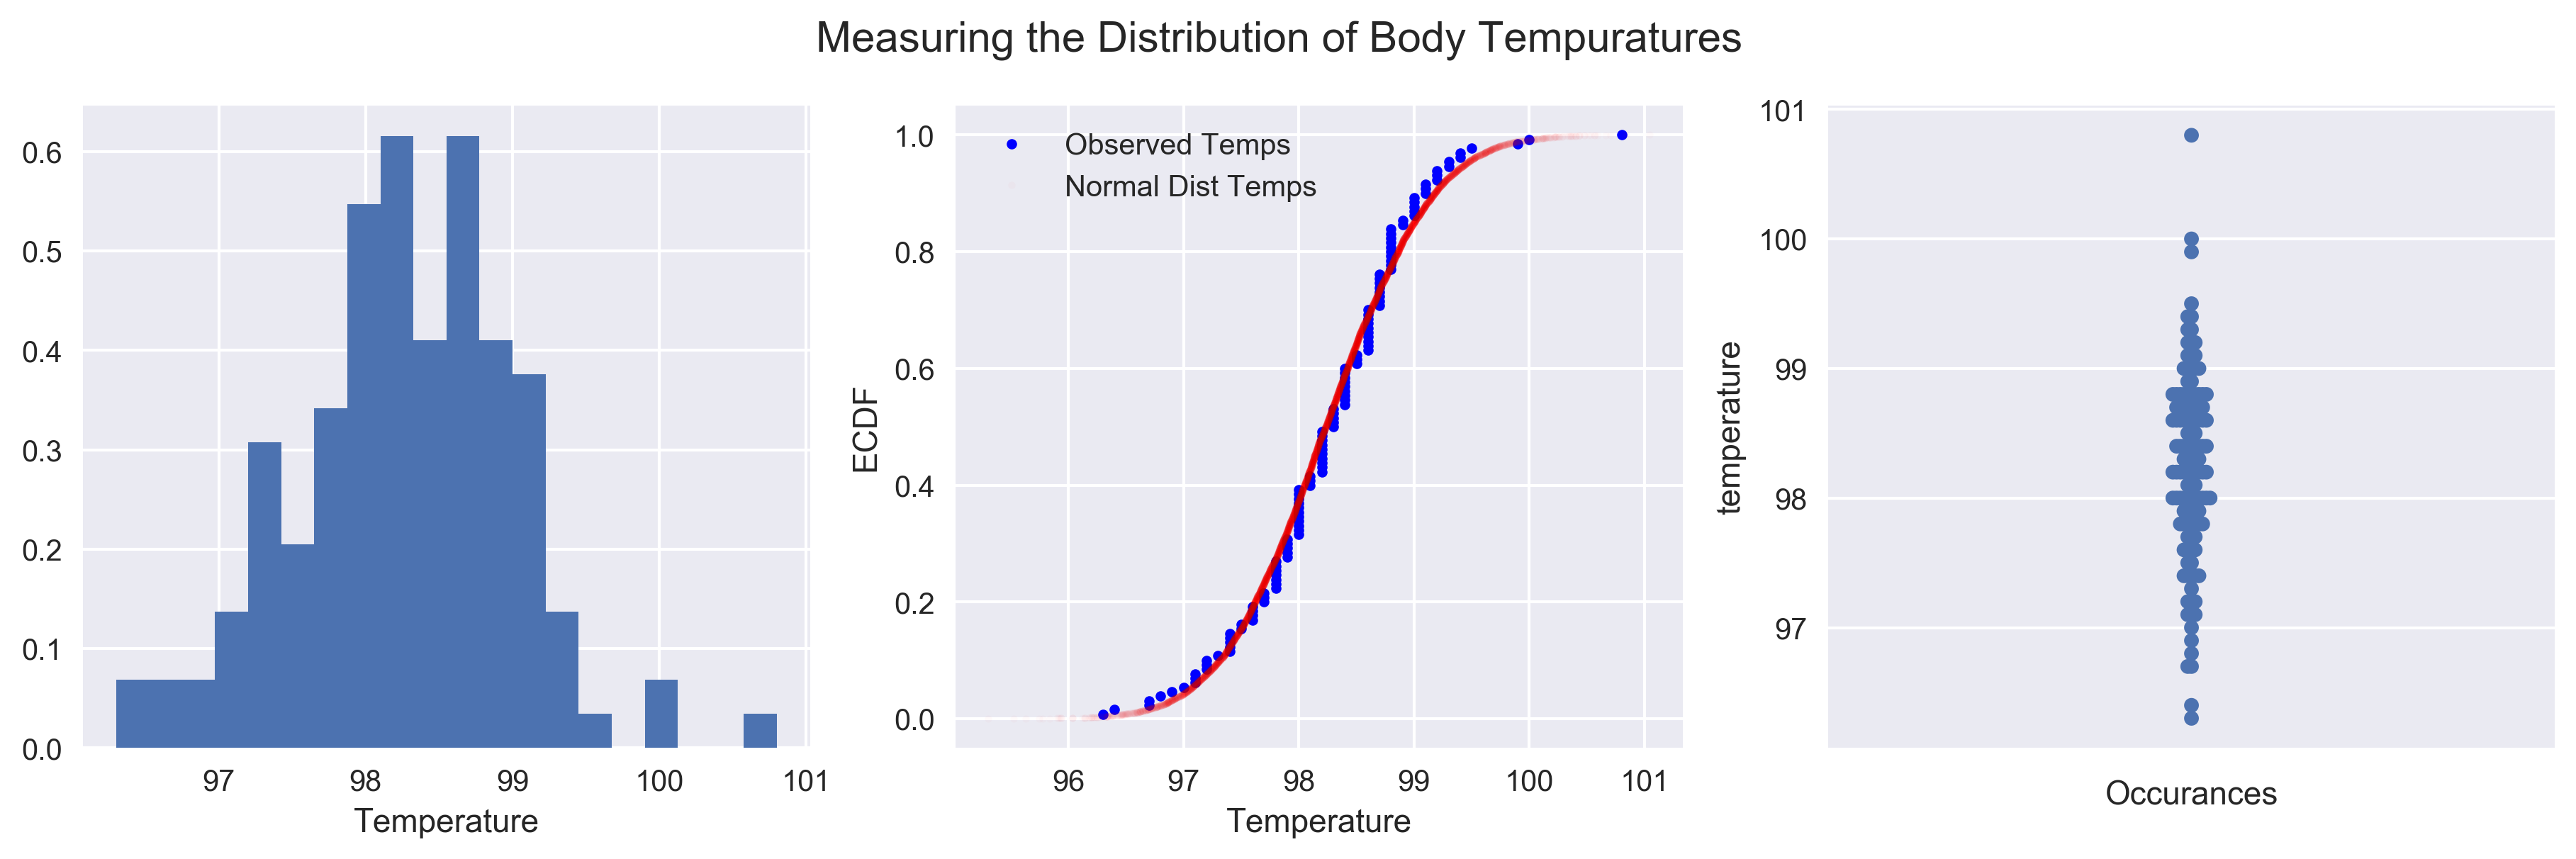

In [5]:
def ecdf(data):
    """This function produces a cumulative density function from a numpy array
       input: numpy array or pandas series
       output: two numpy arrays, x & y. x is the x axis of an ECDF and y is the y axis."""
    n=len(data)
    x=np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

# Set a shortcut to the target series
temp = df['temperature']

# Get the ecdf of the observed values and theoretical normal distribution values of our target
obs_x,obs_y = ecdf(temp)
np.random.seed(12)
theor_x,theor_y = ecdf(np.random.normal(temp.mean(),temp.std(),10000))

#Set up 3 subplots on 1 row
fig,[ax0,ax1,ax2] = plt.subplots(1,3,figsize=(15,4),dpi=300)

# Plot the histogram of temperature data
temp.hist(bins=20,ax=ax0,normed=True)
ax0.set_xlabel('Temperature')

# Plot the ecdf of the observed and theoretical temperature data
ax1.plot(obs_x,obs_y,marker='.',linestyle='none',color='blue',label='Observed Temps')
ax1.plot(theor_x,theor_y,marker='.',linestyle='none',color='red',label='Normal Dist Temps',markersize=5,alpha=.02)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('ECDF')
ax1.legend()


sns.swarmplot(temp,ax=ax2,orient='vertical')
ax2.set_xlabel('Occurances')

plt.suptitle('Measuring the Distribution of Body Tempuratures')
plt.savefig(filename = 'bodyTempDist.jpg',dpi=300,pad_inches=.2)
plt.show()


### It looks like it's close to a normal distribution and may represent the population. We'll need to perform more tests to be sure.

<a id="q2"></a>
# 2.) Is The Sample Size Large Enough?

In [6]:
print('Sample size:', len(temp))

Sample size: 130


Sample size generally relies on the size of the population and what we're trying to explore. If we find that the confidence bands are too wide, then we probably will need a higher sample size. But generally speaking, to do CLT, we need a minimum sample size of 30

<a id="q3"></a>
# 3.) Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  t  or  z  statistic?
- Now try using the other test. How is the result be different? Why?

<b>Null Hypotheses:</b> The true population mean body tempurature is equal to conventional belief the mean body temperature is 98.6 degrees F.

Because it's a long common held belief that the mean normal body temp is 98.6 degrees F, we don't have any data that this was derived from. Since we have our own sample of data we'd like to test the conventional temperature against, we'll complete a one-sample test.

#### We did not quite cover z stats in the data camp boostrap tutorial but here is the breakdown and reasons for when to use one or the other. 

<i> FROM Difference Between Z-test and T-test | Difference Between http://www.differencebetween.net/miscellaneous/difference-between-z-test-and-t-test/#ixzz563nQD2nj </i>

1. Z-test is a statistical hypothesis test that follows a normal distribution while T-test follows a Student’s T-distribution.
2. A T-test is appropriate when you are handling small samples (n < 30) while a Z-test is appropriate when you are handling moderate to large samples (n > 30).
3. T-test is more adaptable than Z-test since Z-test will often require certain conditions to be reliable. Additionally, T-test has many methods that will suit any need.
4. T-tests are more commonly used than Z-tests.
5. Z-tests are preferred than T-tests when standard deviations are known.

Since we don't know the standard deviation of the population, it may be better to use the T test in this scenario but either will fly with a sample size of 130

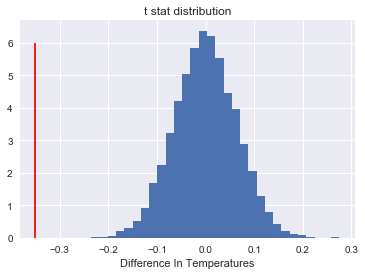

Observed t statistic: -0.35076923076921673
Confidence Bands at 99% confidence interval: [-0.16846154  0.1677    ]
p-value: 0.0


In [7]:
## Bootstrap a t statistic

# Shift data set to mean of 98.6 and test for significance
meanTemp = 98.6
shifted_temp = temp-temp.mean()+meanTemp

#t-statistic = mean of data less conventional body temp mean
#t-stat function
def diff_from_conventional(data, conventional=98.6):
    return data.mean() - conventional

#Observed tstat
obs_tstat = diff_from_conventional(temp)
def draw_bs_replicates(data,randFunc,tstatFunc,size=10000):
    """ Draw simulated or boostrapped repilcates values of data size times with a sample size that equals
        observed sample size
       
        In: data = numpy array or pandas series
            randFunc = function to use to draw random samples, ex: np.random.permuatation,np.random.choice
            tstatFunc = function to complete the tstat with
            
        Out: bs_replicates = numpy array of simulated t stats"""

    #Initialize empty array for tested data points
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = tstatFunc(randFunc(data,size=len(data)))
    return bs_replicates

# Draw replicates of shifted temp data
bs_replicates = draw_bs_replicates(shifted_temp,np.random.choice,diff_from_conventional,size=10000)

# Plot histogram of tstat and red bar of observed tstat
ax=plt.figure(figsize=(6,4))
plt.title('t stat distribution')
plt.hist(bs_replicates,bins=30,normed=True)
plt.xlabel('Difference In Temperatures')
plt.vlines(x=obs_tstat,ymin=0,ymax=6,color='red')
plt.savefig('tstat.png')
plt.show()

#Print observed tstat vs confidence bands of simulated tstats
print('Observed t statistic:',obs_tstat)
print('Confidence Bands at 99% confidence interval:', str(np.percentile(bs_replicates,[.5,99.5])))

#Mean of series temp is 98.2, less than the conventional mean temp. Use less than in t stat.
print('p-value:', np.sum(bs_replicates<=obs_tstat)/len(bs_replicates))

The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected.

<b>Now I'll bootstrap the z statistic using the shifted data to see if we come up with a different outcome</b>

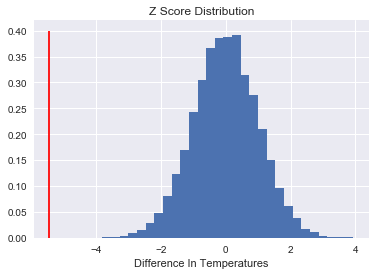

Observed z statistic: -5.45482329236
Confidence Bands at 99% confidence interval: [-2.69144382  2.57195954]
p-value: 0.0


In [8]:
#observed z score
sem = temp.std()/np.sqrt(len(temp)) #standard error
obs_z = (temp.mean() - meanTemp) / sem # zscore

def draw_bs_replicates_zscore(data,randFunc,tstatFunc,size=10000):
    """ Draw simulated or boostrapped repilcates values of data size times with a sample size that equals
        observed sample size
    
        In: data = numpy array or pandas series
            randFunc = function to use to draw random samples, ex: np.random.permuatation,np.random.choice
            tstatFunc = function to complete the tstat with
            
        Out: bs_replicates = numpy array of simulated t stats"""

    #Initialize empty array for tested data points
    bs_replicates = np.empty(size)
    
    for i in range(size):
        simData = randFunc(data,size=len(data))
        sem = simData.std()/np.sqrt(len(simData))
        bs_replicates[i] = tstatFunc(simData)/sem
    return bs_replicates

zvalues = draw_bs_replicates_zscore(shifted_temp,np.random.choice,diff_from_conventional,size=10000)
ax1 = plt.figure(figsize=(6,4))
plt.title('Z Score Distribution')
plt.hist(zvalues,bins=30,normed=True)
plt.xlabel('Difference In Temperatures')
plt.vlines(obs_z,0,.4,color='red')
plt.savefig('zscore.png')
plt.show()

#Print observed tstat vs confidence bands of simulated tstats
print('Observed z statistic:',obs_z)
print('Confidence Bands at 99% confidence interval:', str(np.percentile(zvalues,[.5,99.5])))

#Mean of series temp is 98.2, less than the conventional mean temp. Use less than in t stat.
print('p-value:', np.sum(zvalues<=obs_z)/len(zvalues))

The z-statistic also falls outside the z-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected again.

<a id="q4"></a>
# 4.) Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?

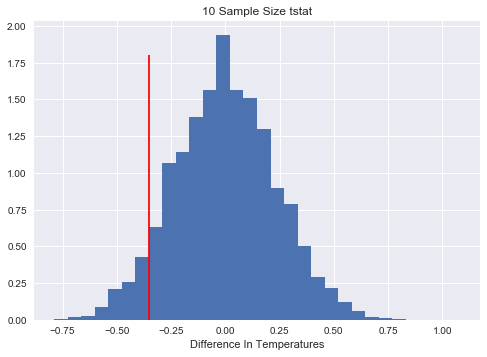

10 sample t test
Observed t statistic: -0.35076923076921673
Confidence Bands at 95% confidence interval: [-0.37923077  0.38076923]
Confidence Bands at 99% confidence interval: [-0.57923077  0.60076923]
p-value: 0.0643


In [9]:
def draw_bs_replicates_10sample(data,randFunc,tstatFunc,size=10000):
    """ Draw simulated or boostrapped repilcates values of data size times with a sample size of of 10
    
        In: data = numpy array or pandas series
            randFunc = function to use to draw random samples, ex: np.random.permuatation,np.random.choice
            tstatFunc = function to complete the tstat with
            
        Out: bs_replicates = numpy array of simulated t stats"""

    #Initialize empty array for tested data points
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = tstatFunc(randFunc(data,size=10))
    return bs_replicates

# Draw replicates of shifted temp data
np.random.seed(20)
bs_replicates = draw_bs_replicates_10sample(shifted_temp,np.random.choice,diff_from_conventional,size=10000)

# Plot histogram of tstat and red bar of observed tstat
plt.hist(bs_replicates,normed=True,bins=30)
plt.title('10 Sample Size tstat')
plt.xlabel('Difference In Temperatures')
plt.vlines(x=obs_tstat,ymin=0,ymax=1.8,color='red')
plt.savefig('tstatSmallSample.png')
plt.show()

#Print observed tstat vs confidence bands of simulated tstats
print('10 sample t test')
print('Observed t statistic:',obs_tstat)
print('Confidence Bands at 95% confidence interval:', str(np.percentile(bs_replicates,[5,95])))
print('Confidence Bands at 99% confidence interval:', str(np.percentile(bs_replicates,[.5,99.5])))
#Mean of series temp is 98.2, less than the conventional mean temp. Use less than in t stat.
print('p-value:', np.sum(bs_replicates<=obs_tstat)/len(bs_replicates))

When comparing the 10 sample t test bootstrap simulation vs the normal sample size simulation, we see wider confidence interval bands with a p value of .06. We would not reject the null hypothesis at a 99% or a 95% confidence interval

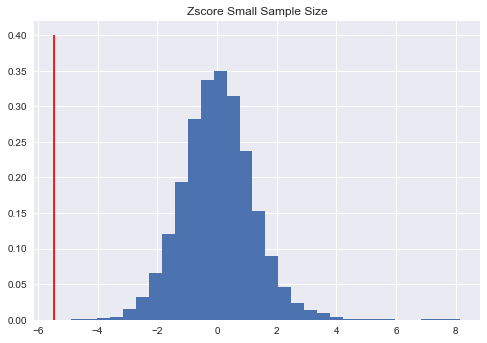

10 sample z test
Observed z statistic: -5.45482329236
Confidence Bands at 99% confidence interval: [-3.01967695  3.66501336]
p-value: 0.0


In [10]:
def draw_bs_replicates_zscore_10sample(data,randFunc,tstatFunc,size=1):
    """ Draw simulated or boostrapped repilcates values of data size times with a sample size of of 10
    
        In: data = numpy array or pandas series
            randFunc = function to use to draw random samples, ex: np.random.permuatation,np.random.choice
            tstatFunc = function to complete the tstat with
            size = number of simulated data sets to calculate
            
        Out: bs_replicates = numpy array of simulated t stats"""

    #Initialize empty array for tested data points
    bs_replicates = np.empty(size)
    
    for i in range(size):
        simData = randFunc(data,size=10)
        sem = simData.std()/np.sqrt(len(simData))
        bs_replicates[i] = tstatFunc(simData)/sem
    return bs_replicates

np.random.seed(20)
zvalues = draw_bs_replicates_zscore_10sample(shifted_temp,np.random.choice,diff_from_conventional,size=10000)
plt.title('Zscore Small Sample Size')
plt.hist(zvalues,normed=True,bins=30)
plt.vlines(obs_z,0,.4,color='red')
plt.savefig('zscoreSmallSample.png')
plt.show()

#Print observed tstat vs confidence bands of simulated tstats
print('10 sample z test')
print('Observed z statistic:',obs_z)
print('Confidence Bands at 99% confidence interval:', str(np.percentile(zvalues,[.5,99.5])))

#Mean of series temp is 98.2, less than the conventional mean temp. Use less than in t stat.
print('p-value:', np.sum(zvalues<=obs_z)/len(zvalues))

Again comparing the 10 sample test vs the normal sample test, we see wider confidence bands again but a p-value close to 0 so we would still reject the hypothesis in this case

<b> 10 sample summary </b>
The test statistic falls outside the t-distribution corresponding to a 99% confidence level for both test but only the z test rejects the null hypothesis at 95% confidence levels.  The distribution of scores is wider for both tests so there is more variability. The t-test is less senitive than the z test.

<a id="q5">,/a>
# 5.) At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [11]:
def CIbandzCrit(data,conf):
    n = len(data)
    std = data.std()
    m = data.mean()

    #calc standard error of the mean
    stdError = std/np.sqrt(n)

    #Get critical value or the value at which we reject the null hypothesis
    criticalValue = stats.norm.ppf(conf)

    #Margin of Error = critical value * standard deviation
    marginError = criticalValue * std

    #Calculate the confidence interval at 99.5%
    ciHigh = m + marginError
    ciLow = m - marginError
    return ciLow,ciHigh

ciLow, ciHigh = CIbandzCrit(temp,.995)

print('With 99.5% confidence, the normal body temperature is between:',
      ('{:0.2f}'.format(ciLow),'{:0.2f}'.format(ciHigh)),
      '\nand anything outside of it is abnormal\n')

With 99.5% confidence, the normal body temperature is between: ('96.36', '100.14') 
and anything outside of it is abnormal



<a id="q6"></a>

# 6.) Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

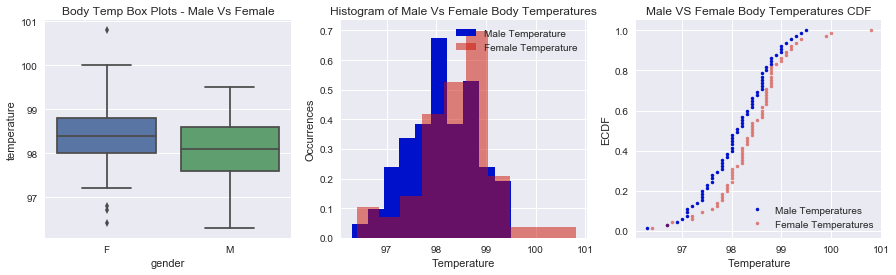

In [12]:
# Set Each Gender To Its Own DF
maleTemp = df[df['gender']=='M']['temperature'].copy()
femaleTemp = df[df['gender']=='F']['temperature'].copy()

maleTemp.name='Male Temperature'
femaleTemp.name = 'Female Temperature'

# Build 1 row, 3 columns worth of subplots
fig,[ax0,ax1,ax2] = plt.subplots(1,3,figsize=(15,4))

# Plot boxplots of body temperatures using original data frame
sns.boxplot(x='gender',y='temperature',data=df,ax=ax0)
ax0.set_title('Body Temp Box Plots - Male Vs Female')

# Plot histograms of each gender's temperature
ax1.hist(maleTemp,bins=10,color='#0011CC',normed=True)
ax1.hist(femaleTemp,bins=10,color='#CC1100',normed=True,alpha=.5)
ax1.set_title('Histogram of Male Vs Female Body Temperatures')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Occurrences')
ax1.legend()

# Plot ecdf of each gender's temperature
mx,my = ecdf(maleTemp)
fx,fy = ecdf(femaleTemp)
ax2.plot(mx,my,marker='.',linestyle='None',color='#0011CC',label='Male Temperatures')
ax2.plot(fx,fy,marker='.',linestyle='None',color='#CC1100',alpha=.5,label='Female Temperatures')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('ECDF')
ax2.set_title('Male VS Female Body Temperatures CDF')
ax2.legend()
plt.savefig('malevfemale.png')
plt.show()

<b>Null Hypotheses:</b> There is a difference between males & females normal body temperature

<b>Test Statistic:</b> Two Sample Z test

In [13]:
# Since the null hypothesis states they have the same normal ranges,
# we will shift the temperatures to the mean of the population
shiftedFem = femaleTemp - femaleTemp.mean() + temp.mean()
shiftedMale = maleTemp - maleTemp.mean() + temp.mean()

# use a two sample z test
# https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means
z0 = (femaleTemp.mean()-maleTemp.mean() - 0) 
z0 = z0 / np.sqrt(((maleTemp.std() ** 2)/ len(shiftedMale)) + ((femaleTemp.std() ** 2)/ len(shiftedFem))) 
p = stats.norm.sf(abs(z0))*2

print('zScore: {0:0.4f}'.format(z0))
print('pValue: {0:0.4f}'.format(p))

zScore: 2.2854
pValue: 0.0223


P value:  0.0248


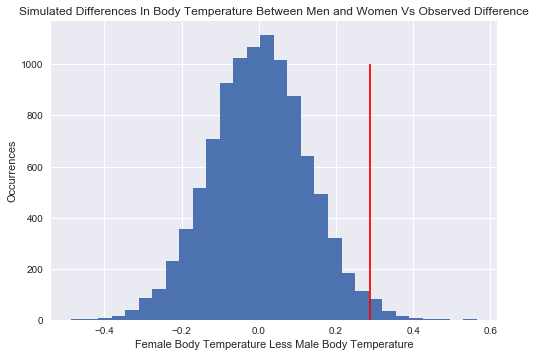

In [14]:


# Get the difference of Confidence interval bands on 1000 random choice samples
repZ = np.empty(10000)

for i in range(10000):
    fTemp = np.random.choice(shiftedFem,size=len(shiftedFem))
    mTemp = np.random.choice(shiftedMale,size=len(shiftedMale))
    
    z = fTemp.mean()-mTemp.mean()
    #z = z / np.sqrt(((mTemp.std() ** 2) / len(shiftedMale)) + ((fTemp.std() ** 2)/ len(shiftedFem))) 
    
    repZ[i] = z

plt.hist(repZ,bins=30)
plt.vlines(femaleTemp.mean()-maleTemp.mean(),0,1000,color='red')
pvalue = (np.sum(repZ>femaleTemp.mean()-maleTemp.mean())/len(repZ))*2 #Multply By Two For Two Tail
print('P value: ',pvalue)
plt.title('Simulated Differences In Body Temperature Between Men and Women Vs Observed Difference')
plt.xlabel('Female Body Temperature Less Male Body Temperature')
plt.ylabel('Occurrences')
plt.savefig('bodyTemp.png')
plt.show()

## With p values around .02, it is plausible that men and women have a different range of body temperatures. With that, we accept the null hypothesis that there is a difference between male and female body temperatures.

# Body Temperature Conclusion
Since coneptualized 120 years ago, the average beody temperature has been accepted to be 98.6 degree F. We wanted to check if it were statistically correct.

We have a sample of 130 body temperatures and wanted to start by answering the followig question<BR><BR>

<B>Q: Is the distribution of body temperatures normal?
<UL><LI>Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.</LI></UL></B>

![Is the body temp normally distributed?](bodyTempDist.jpg "Is the body temperature of our sample normally distributed?")

[View Code](#q1)


After reviewing the dataset, it was normally distributed.

<B>Next, we wanted to see if the sample size was large enough to perform CLT (having a large enough sample size is a prereq for CLT)</B>

It was determined that our sample size of 130 was more than enough to proceed. [View Code](#q2)

<BR>Next, we need to answer the following:

<b>Q.) Is the true population mean really 98.6 degrees F?
<UL><LI>Would you use a one-sample or two-sample test? Why?</LI>
<LI>In this situation, is it appropriate to use the  t  or  z  statistic?</LI></UL></b>

We set our null hypthesis as follows:

<b>Null Hypotheses:</b> The true population mean body tempurature is equal to conventional belief the mean body temperature is 98.6 degrees F.

To answer the one tail or two tail question, we stated the following:

Because it's a long common held belief that the mean normal body temp is 98.6 degrees F, we don't have any data that this was derived from. Since we have our own sample of data we'd like to test the conventional temperature against, we'll complete a one-sample test.

When it comes to using the t stat or z stat, they both were very similar and in the case where we don't have a standard deviation for the conventional temperature, the t stat will be best.

<table><tr>
<td><img src='tstat.png' style="width: 400px;"></img></td>
<td><img src='zscore.png' style="width: 400px;"></img></td>
</tr></table><br>
[View Code](#q3)


<B> We wanted to see if a small sample size would change our results</B><br>
And it seems that it did.

<table><tr>
<td><img src='tstatSmallSample.png' style="width: 400px;"></img></td>
<td><img src='zscoreSmallSample.png'style="width: 400px;"></img></td>
</tr></table><BR>

We discovered that in the case of small samples, the z score is definitely better to use as suspected.<br>
[View Code](#q4)<BR>

<b> When looking at what the normal range of body temperatures are, we discovered they're between 96.3 and 100.4 which makes sense. At 95 degrees, we're considered to be in hypothermia and at 101 degrees we are considered to have a fever.</b><br>
[View Code](#q5)
<BR>

<b>Finally, we wanted to see if there was a difference between men and women normal temperatures.</b>

Our first step was to look at the distribution differences of temperature between men and women:
<img src="malevfemale.png"></img>

It looks like there is most definitly a difference but is it significant?

<b>Null Hypotheses:</b> There is a difference between males & females normal body temperature

<b>Test Statistic:</b> Two Sample Z Test

Our p value was 0.022 which means we can reject our null hypothesis at a 99% confidence level, but we can accept it at a 95% confidence level.

<img src='bodyTemp.png'></img>

[View Code](#q6)